In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera-firstWeek.csv")

In [3]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,...,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


In [4]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [5]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [6]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [7]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'  and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return True
  elif(row['Denied Code'].strip() != '-' and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return False
  else:
    return None
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [8]:
df['accepted'] = df['accepted'].astype('object')
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,...,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [9]:
df.describe()

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.0
mean,1879.797762,74.430840,70.177159,4.253681,871.243333,401.790642,529.682649,529.871199,1.0
std,1855.788213,272.176087,269.844094,43.139730,1487.984570,1141.806291,1231.389073,1186.557814,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3900.000000,0.000000,0.000000,0.000000,500.000000,37.000000,249.000000,651.000000,1.0
max,6600.000000,4600.000000,4600.000000,1590.000000,6600.000000,6600.000000,6600.000000,10110.420000,1.0


In [10]:
df.describe(include=['object'])

,Ticket Number,Carrier Code,FinancialClass,CPT,NPI,Ordering Clinic,Denied Code,Provider Profile,accepted
count,22696,22696,22696,22696,22696,22696,22696,22696,22696
unique,22696,394,8,40,2922,1744,80,2,2
top,104499,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,2512,12376,5019,310,310,9035,22357,13661


In [11]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df=df.rename(columns={"DateofService": "DateOfService"})

In [13]:
df.head()

,TicketNumber,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,FinancialClass,CPT,...,NPI,OrderingClinic,DeniedCode,FirstBilledDate,ProviderProfile,InsuranceBal,PatientBal,AllowedAmount,CaseCount,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,...,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [14]:
df.describe()

,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,InsuranceBal,PatientBal,AllowedAmount,CaseCount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000,22696.0
mean,1879.797762,74.430840,70.177159,4.253681,871.243333,401.790642,529.682649,529.871199,1.0
std,1855.788213,272.176087,269.844094,43.139730,1487.984570,1141.806291,1231.389073,1186.557814,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3900.000000,0.000000,0.000000,0.000000,500.000000,37.000000,249.000000,651.000000,1.0
max,6600.000000,4600.000000,4600.000000,1590.000000,6600.000000,6600.000000,6600.000000,10110.420000,1.0


In [15]:
df = df.dropna(subset=['FirstBilledDate'])
df['timedelta'] = (df['FirstBilledDate'] - df['DateOfService']).dt.days.astype(int)
df[['DateOfService', 'FirstBilledDate', 'timedelta']].head()

,DateOfService,FirstBilledDate,timedelta
0,2019-01-02,2019-01-08,6
1,2019-01-02,2019-01-08,6
3,2019-01-02,2019-01-08,6
4,2019-01-02,2019-01-08,6
5,2019-01-02,2019-01-08,6


In [16]:
df.describe(include=['object'])

,TicketNumber,CarrierCode,FinancialClass,CPT,NPI,OrderingClinic,DeniedCode,ProviderProfile,accepted
count,22562,22562,22562,22562,22562,22562,22562,22562,22562
unique,22562,392,8,39,2860,1721,80,2,2
top,104499,AETLIF-E,CT - CONTRACTED,81420,1669532347,MOORE OB/GYN,-,NTINC,False
freq,1,2511,12375,5019,310,310,8901,22223,13661


In [17]:
df.to_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera_first_week_process_data.csv")

In [18]:
df.shape

(22562, 23)

In [19]:
df.isnull().sum()

TicketNumber        0
DateOfService       0
CarrierCode         0
Charges             0
Payments            0
InsurancePayment    0
PatientPayment      0
Writeoffs           0
FinancialClass      0
CPT                 0
DateofEntry         0
PaymentPostDate     0
NPI                 0
OrderingClinic      0
DeniedCode          0
FirstBilledDate     0
ProviderProfile     0
InsuranceBal        0
PatientBal          0
AllowedAmount       0
CaseCount           0
accepted            0
timedelta           0
dtype: int64

In [20]:
charges = df['Charges']

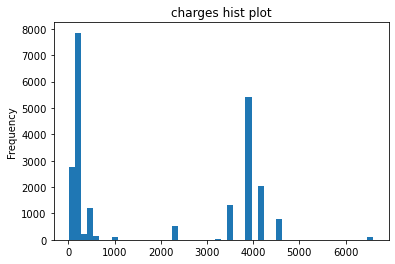

In [21]:
charges.plot(kind='hist', title='charges hist plot', bins=50)

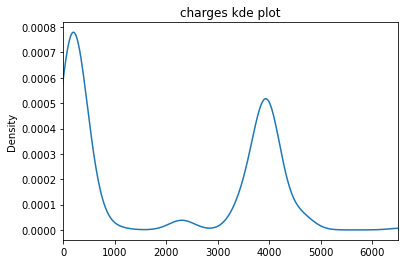

In [22]:
charges.plot(kind='kde', title='charges kde plot',xlim=(0, 6500))

In [23]:
charges.describe()

count    22562.000000
mean      1883.571669
std       1860.330346
min         10.000000
25%        185.000000
50%        500.000000
75%       3900.000000
max       6600.000000
Name: Charges, dtype: float64

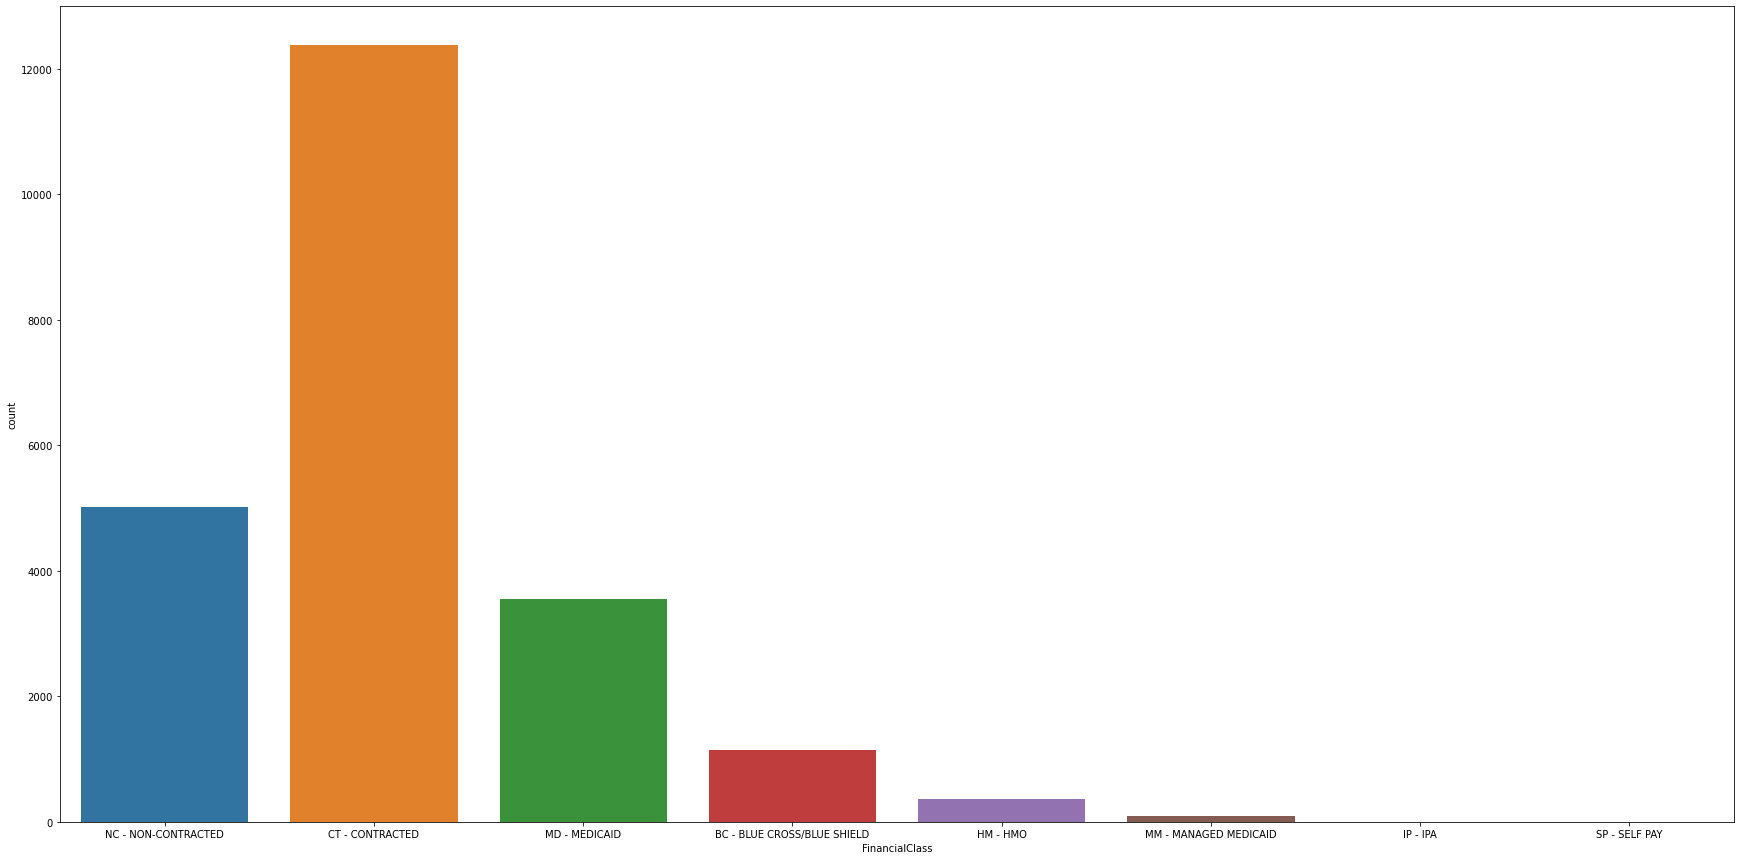

In [24]:
plt.figure(figsize=(30,15))
sns.countplot(df['FinancialClass'])

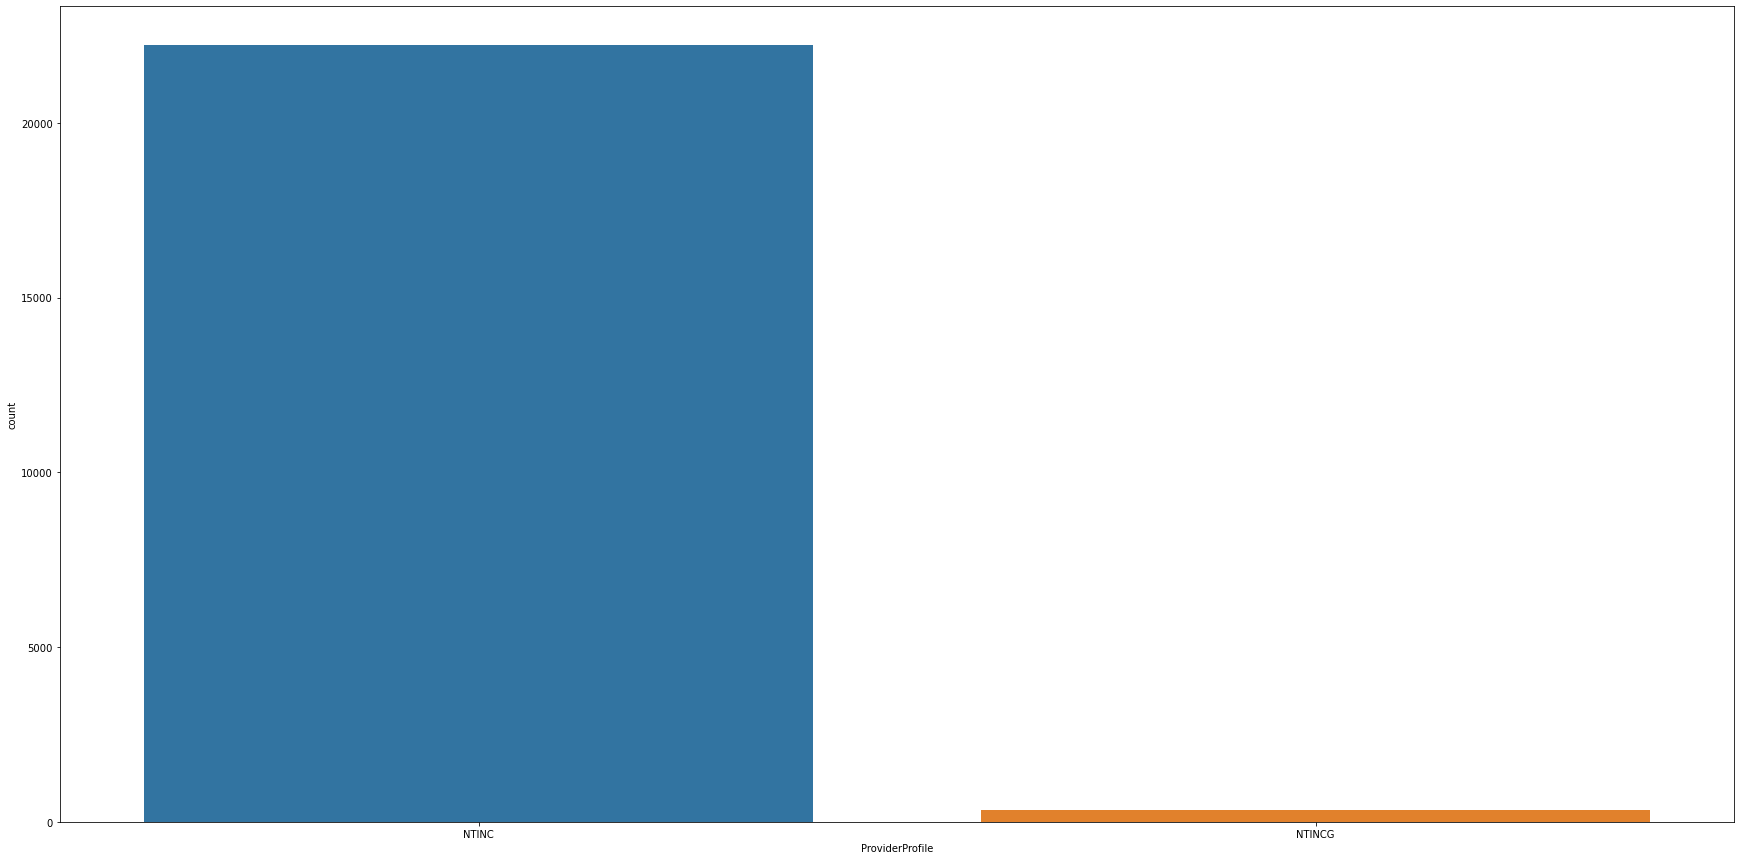

In [25]:
plt.figure(figsize=(30,15))
sns.countplot(df['ProviderProfile'])

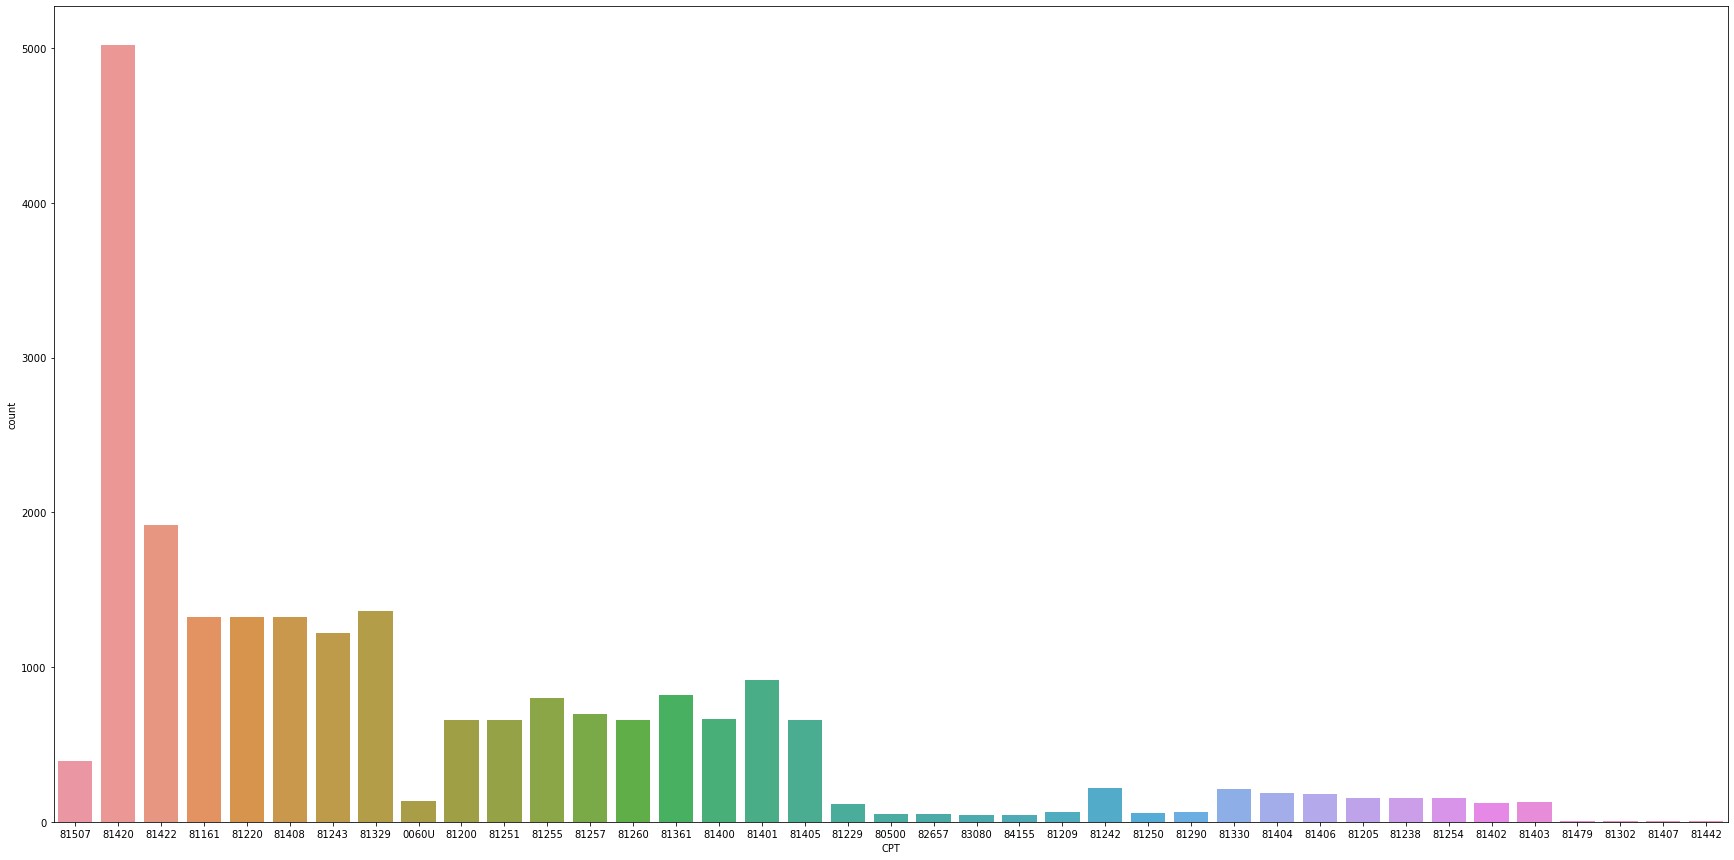

In [26]:
plt.figure(figsize=(30,15))
sns.countplot(df['CPT'])

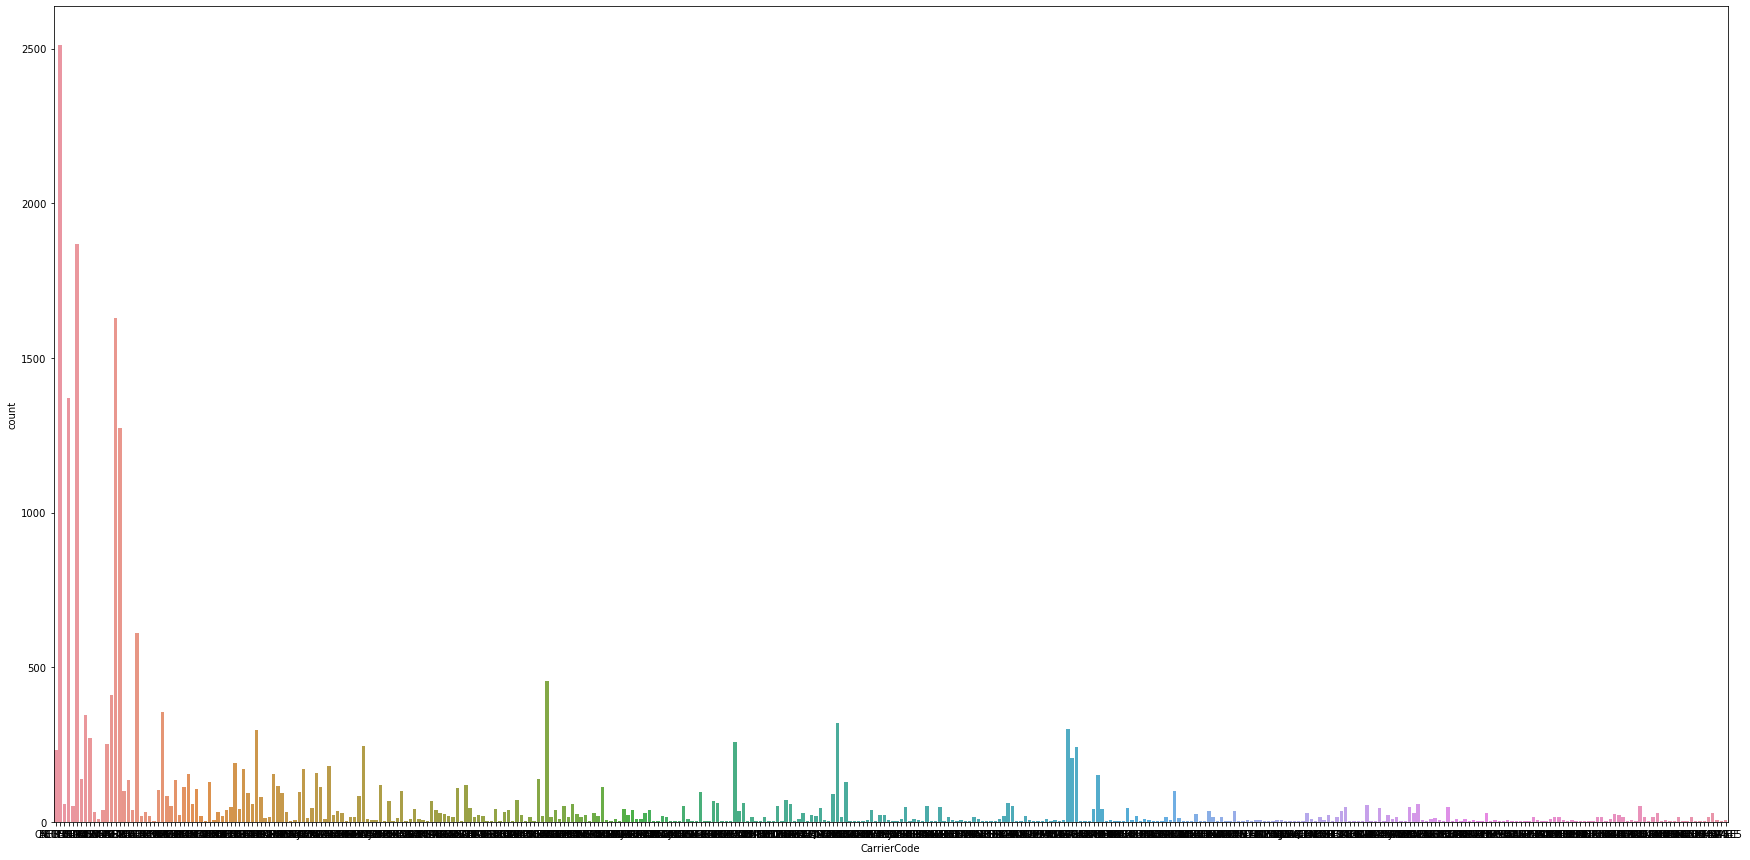

In [27]:
plt.figure(figsize=(30,15))
sns.countplot(df['CarrierCode'])

In [28]:
df = df.drop(['CaseCount', 'TicketNumber'], axis=1)

In [29]:
df.head()

,DateOfService,CarrierCode,Charges,Payments,InsurancePayment,PatientPayment,Writeoffs,FinancialClass,CPT,DateofEntry,...,NPI,OrderingClinic,DeniedCode,FirstBilledDate,ProviderProfile,InsuranceBal,PatientBal,AllowedAmount,accepted,timedelta
0,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,False,6
1,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,...,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,False,6
3,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,True,6
4,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,True,6
5,2019-01-02,AETLIF-E,4100.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81422,2019-01-07,...,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,96,2019-01-08,NTINC,0.0,4100.0,749.0,False,6


In [30]:
charges.head()

0    3900.0
1    3900.0
3    3900.0
4    3900.0
5    4100.0
Name: Charges, dtype: float64

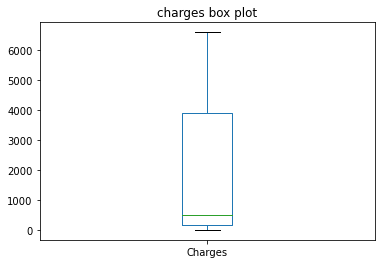

In [31]:
charges.plot(kind='box', title='charges box plot')

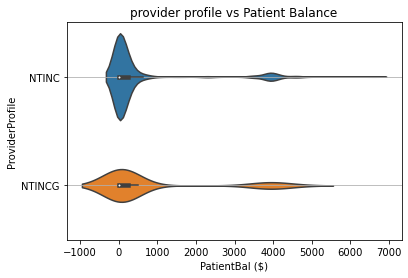

In [32]:
fontsize = 10

fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('PatientBal','ProviderProfile', data=df, ax = axes)
axes.set_title('provider profile vs Patient Balance')

axes.yaxis.grid(True)
axes.set_xlabel('PatientBal ($)')
axes.set_ylabel('ProviderProfile')

plt.show()

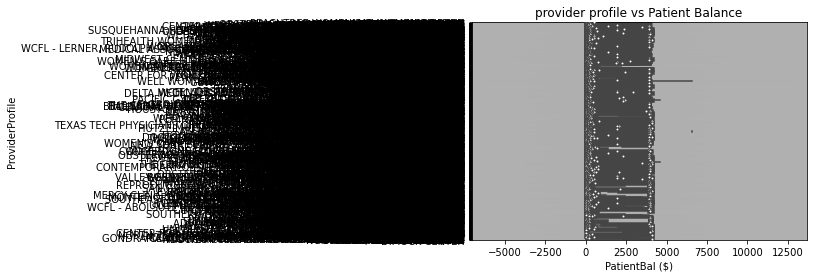

In [33]:
fontsize = 10

fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('PatientBal','OrderingClinic', data=df, ax = axes)
axes.set_title('provider profile vs Patient Balance')

axes.yaxis.grid(True)
axes.set_xlabel('PatientBal ($)')
axes.set_ylabel('ProviderProfile')

plt.show()

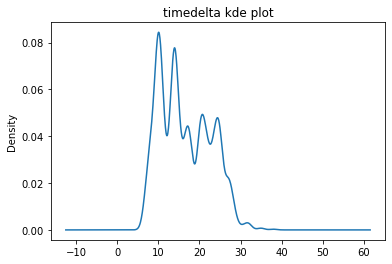

In [34]:
timedelta=df['timedelta']
timedelta.plot(kind='kde', title='timedelta kde plot')

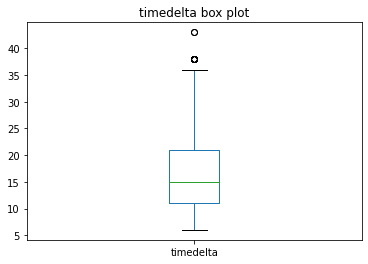

In [35]:
timedelta.plot(kind='box', title='timedelta box plot')

In [36]:
payments=df['Payments']

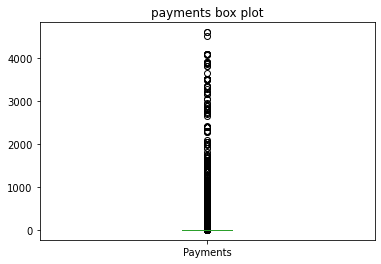

In [37]:
payments.plot(kind='box', title='payments box plot')

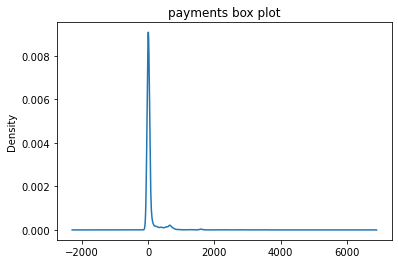

In [38]:
payments.plot(kind='kde', title='payments box plot')

In [39]:
financialClass=df['FinancialClass']

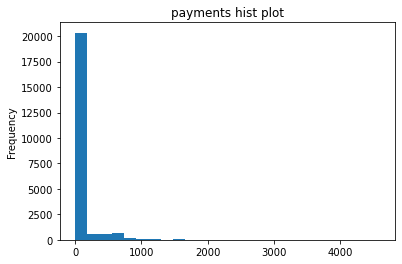

In [40]:
payments.plot(kind='hist',bins=25, title='payments hist plot')

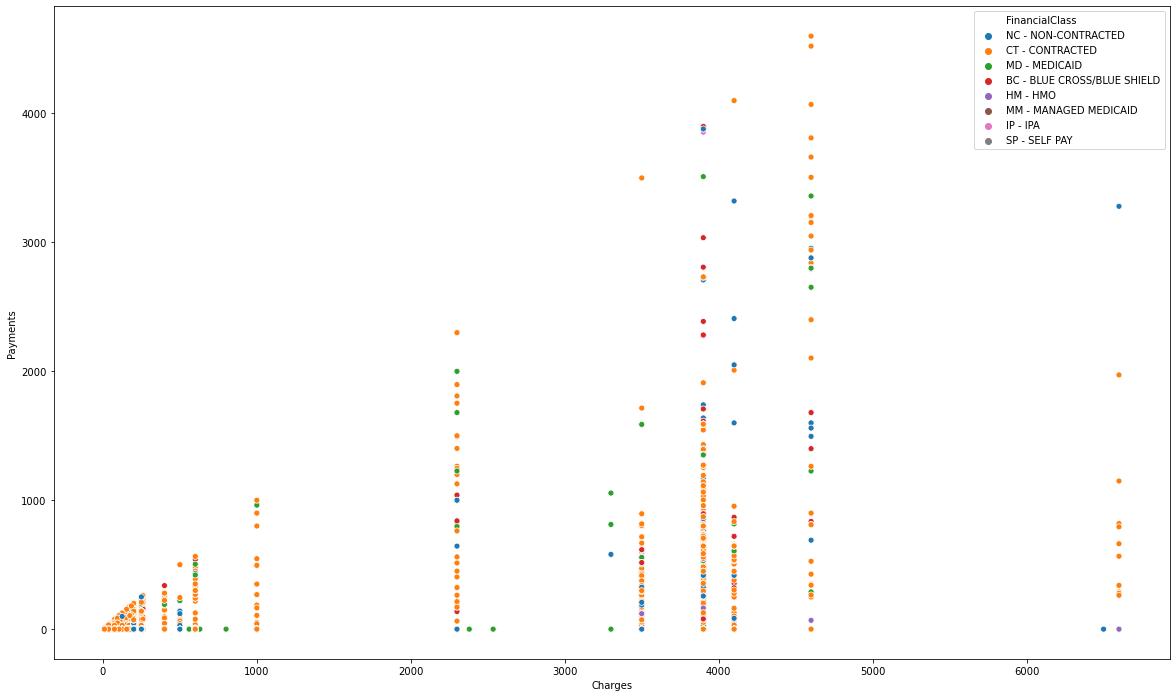

In [41]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=charges, y=payments, hue=financialClass,data=df)

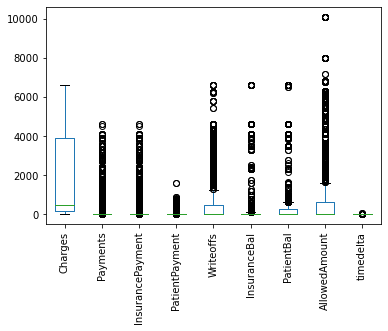

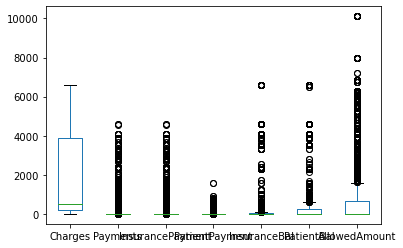

In [44]:
boxplot = df.boxplot(grid=False, rot=90, fontsize=10)
plot_val= ['Charges','Payments', 'InsurancePayment', 'PatientPayment', 'InsuranceBal', 'PatientBal','AllowedAmount']
df[plot_val].plot(kind='box')